In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
from numpy.linalg import norm
import pandas as pd
import random
yf.pdr_override()

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
start_date = "1971-02-05"
end_date = "2018-12-31"
nasdaq = pdr.get_data_yahoo('^IXIC',start=start_date, end=end_date)
nasdaq_data = nasdaq["Adj Close"].fillna(method="ffill").values
nasdaq_vol = nasdaq["Volume"].fillna(method="ffill").values

[*********************100%***********************]  1 of 1 completed


In [32]:
start_testdate = '2019-01-01'
end_testdate = '2020-01-31'

nasdaq_test = pdr.get_data_yahoo('^IXIC', start=start_testdate, end=end_testdate)
nasdaq_testdata = nasdaq_test["Adj Close"].fillna(method="ffill").values
nasdaq_testvol = nasdaq_test["Volume"].fillna(method="ffill").values

[*********************100%***********************]  1 of 1 completed


In [5]:
len(nasdaq_testdata)

272

In [6]:
nasdaq

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...
2018-12-21,6573.490234,6586.680176,6304.629883,6332.990234,6332.990234,4571670000
2018-12-24,6278.490234,6355.180176,6190.169922,6192.919922,6192.919922,1647440000
2018-12-26,6257.859863,6555.529785,6214.339844,6554.359863,6554.359863,2572890000


In [7]:
def Normalization(x):
    return (x - np.mean(x)) / (np.std(x)+1e-7)

In [36]:
# extract features
window_size = 10
x_train = []
for i in range(0, len(nasdaq_data) - window_size):
    x = nasdaq_data[i:i+window_size]
    features = Normalization(x)
    x_train.append(features)


In [11]:
window_size = 10
# n_features = 4
x_test = []
for i in range(0, len(nasdaq_testdata)//window_size):
    x = nasdaq_testdata[window_size*i:window_size*i+window_size]
    features = Normalization(x)
    x_test.append(features)

In [37]:
x_testvol = []
for i in range(0, len(nasdaq_testvol)//window_size):
    x = nasdaq_testvol[window_size*i:window_size*i+window_size]
    features = Normalization(x)
    x_testvol.append(features)

In [38]:
x_train = np.array(x_train)

In [39]:
y_train = np.arange(len(x_train))

In [40]:
len(x_test)

27

In [41]:
def dtw_distance(x, y):
    distance, path = fastdtw(x.ravel(), y.ravel(), dist=euclidean)
    return distance


In [42]:
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Fit the model to the training data
knn.fit(x_train, y_train)

# Use the trained model to make predictions on the test data
# y_pred = knn.predict(x_test)


KNeighborsClassifier(metric='euclidean', n_neighbors=40)

In [43]:
k=40
# find the k most similar windows to the query window
distances, indices = knn.kneighbors(np.array([x_test[0]]), n_neighbors=k)

# print the indices of the k most similar windows
print("The", k, "most similar windows to the query window are:")
print(indices)

The 40 most similar windows to the query window are:
[[ 5716  1244 11830 10047  7310 11278  6283  4067  2709 10128  3090  2338
  10770  5362  9808 11065  2057  2407  3988  2220  7010 11934   374 10469
   6822  8242  4037  1255  6546  3916 11449  1100  3534 10058  7202  2038
   4563  2882  6129  6506]]


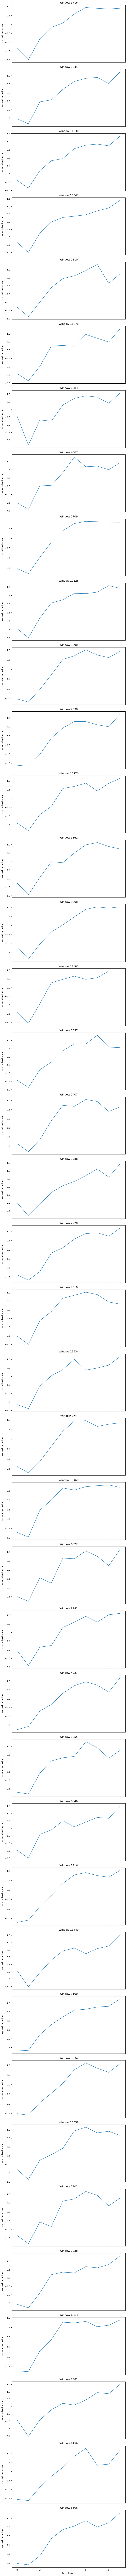

In [18]:
# plot the k most similar windows to the query window
fig, axs = plt.subplots(nrows=k, ncols=1, figsize=(8, 4*k), sharex=True)
for i, idx in enumerate(indices[0]):
    axs[i].plot(x_train[idx])
    axs[i].set_title(f"Window {idx}")
    axs[i].set_ylabel("Normalized Price")
axs[-1].set_xlabel("Time (days)")
plt.tight_layout()
plt.show()

In [87]:
#window 7314 refers to the 7314th window in the x_train array. 
#7314+window_size-1

## 거래량 추가

In [44]:
x_trainvol = []
x_vol=[]

for i in range(0, len(nasdaq_vol) - window_size):
    x = nasdaq_vol[i:i+window_size]
    features = Normalization(x)
    x_trainvol.append(features)

for i in indices[0]:
    x_vol.append(x_trainvol[i])

train_x = np.array(x_vol)
train_y = np.array(indices[0])

knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

knn.fit(train_x, train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [45]:
k=10
# find the k most similar windows to the query window
distances, indice = knn.kneighbors(np.array([x_testvol[0]]), n_neighbors=k)

# print the indices of the k most similar windows
print("The", k, "most similar windows to the query window are:")
print(indice)

The 10 most similar windows to the query window are:
[[33 15 14 21 23 20 24  3  6  8]]


In [46]:
indices=indices[0]
index=[]
for i in indice[0]:
    index.append(indices[i])
index

[10058, 11065, 9808, 11934, 10469, 7010, 6822, 10047, 6283, 2709]

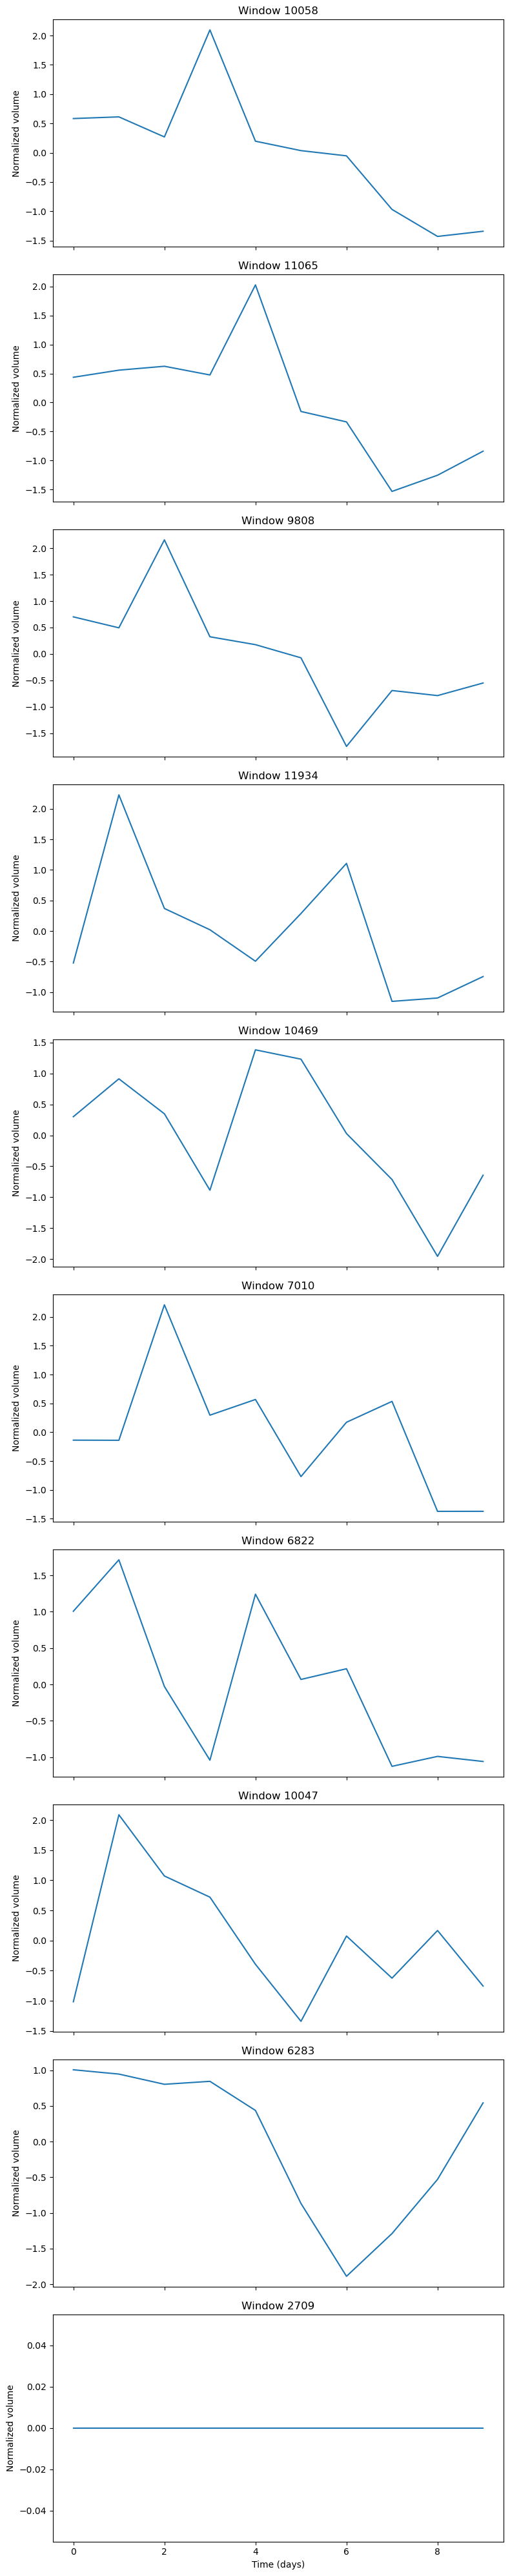

In [48]:
fig, axs = plt.subplots(nrows=k, ncols=1, figsize=(8, 4*k), sharex=True)
for i, idx in enumerate(index):
    axs[i].plot(x_trainvol[idx])
    axs[i].set_title(f"Window {idx}")
    axs[i].set_ylabel("Normalized volume")
axs[-1].set_xlabel("Time (days)")
plt.tight_layout()
plt.show()

In [49]:
for i in index:
    if nasdaq_vol[i]<1:
        index.remove(i)
index

[10058, 11065, 9808, 11934, 10469, 7010, 6822, 10047, 6283]

In [50]:
# get the date range
start_date = nasdaq_test.index[0]
end_date = nasdaq_test.index[window_size-1]

rate_of_return=[]

# print the mean and std of rate of return of the k most similar windows
print(f"The {k} most similar windows's mean and std of rate of returns  ({start_date} - {end_date}) are:")
for i, idx in enumerate(index):
    features = (nasdaq_data[idx+window_size+9]-nasdaq_data[idx+window_size])/nasdaq_data[idx+window_size]
    rate_of_return.append(features)
rate_of_return = np.array(rate_of_return)
print('mean : ',np.mean(rate_of_return), 'std : ',np.std(rate_of_return))

The 10 most similar windows's mean and std of rate of returns  (2019-01-02 00:00:00 - 2019-01-15 00:00:00) are:
mean :  0.003255842623201197 std :  0.03170617756407847


In [51]:
# real rate of return
print('real rate of return : ',
      (nasdaq_testdata[window_size+9]-nasdaq_testdata[window_size])/nasdaq_testdata[window_size])

real rate of return :  0.021094055026551248


## Test data run

In [67]:
startdate=[]
enddate=[]
mean_=[]
std_=[]
real_=[]
for i in range(len(x_test)):
    # 주가
    k=40
    knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')
    knn.fit(x_train, y_train)
    distances, indices = knn.kneighbors(np.array([x_test[i]]), n_neighbors=k)
    print("The", k, "most similar windows to the query window are:")
    print(indices)

    x_vol=[]

    for j in indices[0]:
        x_vol.append(x_trainvol[i])

    train_x = np.array(x_vol)
    train_y = np.array(indices[0])

    knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

    knn.fit(train_x, train_y)
    
    # 거래량 필터링
    k=10
    knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
    knn.fit(train_x, train_y)
    
    distances, indice = knn.kneighbors(np.array([x_testvol[i]]), n_neighbors=k)
    
    index=[indices[0][i] for i in indice[0]]
    
    for d in index:
        if nasdaq_vol[d]<1:
            index.remove(d)
            
    print("The", k, "most similar windows to the query window are:")
    print(index)
    
    start_date = nasdaq_test.index[i*10]
    end_date = nasdaq_test.index[i*10+9]

    rate_of_return=[]

    print(f"The {k} most similar windows's mean and std of rate of returns  ({start_date} - {end_date}) are:")
    for k, idx in enumerate(index):
        features = (nasdaq_data[idx+window_size+9]-nasdaq_data[idx+window_size])/nasdaq_data[idx+window_size]
        rate_of_return.append(features)
    rate_of_return = np.array(rate_of_return)
    print('mean : ',np.mean(rate_of_return), 'std : ',np.std(rate_of_return),
         'real rate of return : ',(nasdaq_testdata[window_size*i+9]-nasdaq_testdata[window_size*i])/nasdaq_testdata[window_size*i])
    print('-'*50)
    startdate.append(start_date)
    enddate.append(end_date)
    mean_.append(np.mean(rate_of_return))
    std_.append(np.std(rate_of_return))
    real_.append((nasdaq_testdata[window_size*i+9]-nasdaq_testdata[window_size*i])/nasdaq_testdata[window_size*i])

The 40 most similar windows to the query window are:
[[ 5716  1244 11830 10047  7310 11278  6283  4067  2709 10128  3090  2338
  10770  5362  9808 11065  2057  2407  3988  2220  7010 11934   374 10469
   6822  8242  4037  1255  6546  3916 11449  1100  3534 10058  7202  2038
   4563  2882  6129  6506]]
The 10 most similar windows to the query window are:
[10047, 10128, 11278, 11830, 7310, 6283, 5716, 4067]
The 10 most similar windows's mean and std of rate of returns  (2019-01-02 00:00:00 - 2019-01-15 00:00:00) are:
mean :  0.009198331009540588 std :  0.04327422717102024 real rate of return :  0.05368937312136198
--------------------------------------------------
The 40 most similar windows to the query window are:
[[ 7773  8946  6728  8862  8160  6619  5692 11890 10585  5060 10269  4432
   7334  2645  1634  2172 12007  8293  1354 11158 10062  6071  6232  1926
   7330  2176   183  5709  4280  8130  4060  8139  1038 10986  8501  3097
   8906  9629  1248 11671]]
The 10 most similar window

The 40 most similar windows to the query window are:
[[10457  1075   601  6905  1090  8804  9486  3178  8888    70 10393  9920
   3289  7945  1017  7792 10905  3572  3066  7300  8186 11497  3000   933
   3765  1696 11757 11089  5288 10163  6356 10948  1513  3573 11079 10679
   6335  2205  6458  3945]]
The 10 most similar windows to the query window are:
[6905, 8804, 8888, 1090, 9486, 10457, 3178]
The 10 most similar windows's mean and std of rate of returns  (2019-07-10 00:00:00 - 2019-07-23 00:00:00) are:
mean :  -0.005721335835608022 std :  0.059834107411734075 real rate of return :  0.00595793195006638
--------------------------------------------------
The 40 most similar windows to the query window are:
[[ 1853  6740  4918   170  2665   527  2300  7142  2897  6958  2620  5437
   4353  4212 11230   510  6402  9906  4182 10031   397  1137 11288 11847
   3392 11324  4952   194 11071  8623  3933  6276  7116  3981  6982  9308
   3476  9197  8449 10382]]
The 10 most similar windows to th

In [68]:
df = pd.DataFrame()
df['start']=startdate
df['end']=enddate
df['mean']=mean_
df['std']=std_
df['real']=real_
df

,start,end,mean,std,real
0,2019-01-02,2019-01-15,0.009198,0.043274,0.053689
1,2019-01-16,2019-01-30,0.004089,0.023495,0.021094
2,2019-01-31,2019-02-13,-0.014718,0.035266,0.019039
3,2019-02-14,2019-02-28,-0.005537,0.035343,0.014216
4,2019-03-01,2019-03-14,0.006784,0.045081,0.004682
5,2019-03-15,2019-03-28,0.001840,0.029344,-0.002518
6,2019-03-29,2019-04-11,0.012670,0.019114,0.028209
7,2019-04-12,2019-04-26,0.017430,0.038301,0.020320
8,2019-04-29,2019-05-10,0.019709,0.021527,-0.030007
9,2019-05-13,2019-05-24,-0.009812,0.040281,-0.001309


In [ ]:
# tool 파레토(요즘)패키지 - 합리적으로 얼마나 비슷한지를 판단하기 위해 사용


In [ ]:
#절대적인 기준은 만들어줘야한다.?

In [ ]:
# 최적화 과정을 통해 가까운 것을 찾아준다.

In [ ]:
# 머신러닝을 통해 최적화하는 방법, 최적화과정에서 가깝다 아니다 판단할 수 있는 방법

In [ ]:
# 먼저 주가, 그리고 거래량 가까운 것을 추출 : 점점 하나씩 더 필터링을 늘림

In [ ]:
# 그 다음 수익률